
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        m, n = X.shape
        # Initializing mean and std.
        self.mean = np.zeros(n)
        self.std = np.zeros(n)
        # Computing the values using numpy functions
        for i in range(n):
            self.mean[i] = np.mean(X[:, i])
            self.std[i] = np.std(X[:, i])
        return self.mean, self.std

    def transform(self, X):
        m, n = X.shape
        # Initialising Scaled version
        X_scaled = np.zeros_like(X)
        # Scaling according to computed mean and std.
        for i in range(n):
            X_scaled[:, i] = (X[:, i] - self.mean[i])
            if self.std[i] != 0:
                X_scaled[:, i] /= self.std[i] # If std is zero, avoid division by zero
        return X_scaled

    def fit_transform(self, X):
        # Calling both fit and transform function
        self.fit(X)
        return self.transform(X)

In [3]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        # Initializing weights, bias and history
        self.weights = None
        self.bias = None
        self.history = np.zeros(epochs) # To store loss at every epoch

    def fit(self, X, y):
        m, n = X.shape
        # Gradient Descent
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        # Iterating for epochs
        for epoch in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias  # Using formula for linear regression
            loss = np.mean((y_pred - y) ** 2) + (self.l2_lambda / (2 * m)) * np.dot(self.weights, self.weights) # MSE + L2
            self.history[epoch] = loss  # Storing loss for current epoch
            # Computing dw and db
            dw = (1 / m) * np.dot(X.T, (y_pred - y)) + (self.l2_lambda / m) * self.weights
            db = (1 / m) * np.sum(y_pred - y)
            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            # Just for visualising convergence
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss: {loss}")
        return self.weights, self.bias, self.history

    def predict(self, X):
        # Again using formula for linear regression with updated weights, bias
        return np.dot(X, self.weights) + self.bias

In [4]:
# Trying to implement L1 regularization
class LinearRegressionManual_L1:  # Everything remain same just L1 terms are used instead of L2
    def __init__(self, lr=0.01, epochs=1000, l1_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l1_lambda = l1_lambda  # L1 parameter
        self.weights = None
        self.bias = None
        self.history = np.zeros(epochs)

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        for epoch in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            loss = np.mean((y_pred - y) ** 2) + (self.l1_lambda / m) * np.sum(np.abs(self.weights)) # MSE + L1
            self.history[epoch] = loss
            dw = (1 / m) * np.dot(X.T, (y_pred - y)) + (self.l1_lambda / m) * np.sign(self.weights) # dw according to L1 loss
            db = (1 / m) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss: {loss}")
        return self.weights, self.bias, self.history

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [5]:
# L1 loss drives weights of irrelevant features to zero while L2 loss penalizes large weights.

In [6]:
# Dataset Creation
np.random.seed(0)
# Size
m = 200   # samples
n = 3     # features

# Features
X = np.random.randn(m, n)
# True parameters
true_weights = np.array([-1.5, 0.9, -1.7])
true_bias = 4.0
# Noise
noise = np.random.normal(0, 0.2, size = m)

# Target
y = np.dot(X, true_weights) + true_bias + noise

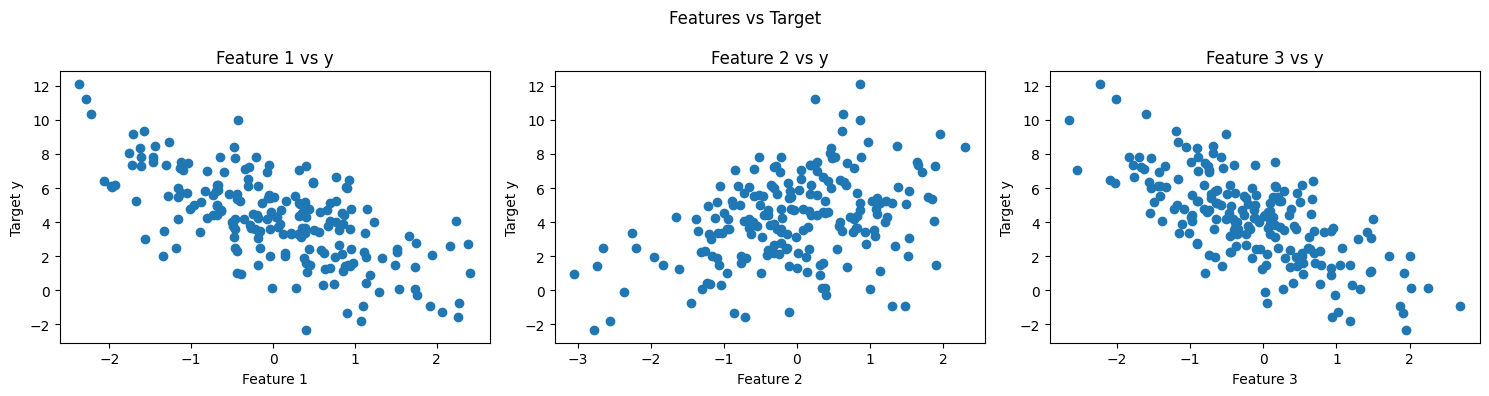

In [7]:
features = X.shape[1]
fig, axes = plt.subplots(1, features, figsize = (5 * features, 4))

for i in range(features):
    axes[i].scatter(X[:, i], y)
    axes[i].set_xlabel(f'Feature {i+1}')
    axes[i].set_ylabel('Target y')
    axes[i].set_title(f'Feature {i+1} vs y')

plt.suptitle('Features vs Target')
plt.tight_layout()
plt.show()

In [8]:
# Train-test split using slicing
X_train, y_train = X[:150], y[:150]
X_test, y_test = X[150:], y[150:]

In [9]:
# Standardize the features
scalar = StandardScalerManual()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [10]:
linear_regression = LinearRegressionManual(l2_lambda = 0.01)  # Calling Linear Regression model with L2 lamda = 0.01

In [11]:
w,b,history = linear_regression.fit(X_train_scaled, y_train)  # Finding the correct weights, bias according to our data
y_pred = linear_regression.predict(X_test_scaled)   # Predicting values for X_test

Epoch 0: Loss: 24.08780070389058
Epoch 100: Loss: 3.0959566905130553
Epoch 200: Loss: 0.4319578616450632
Epoch 300: Loss: 0.09077780245281734
Epoch 400: Loss: 0.04672778278320986
Epoch 500: Loss: 0.04099958247113022
Epoch 600: Loss: 0.040249848316739945
Epoch 700: Loss: 0.04015109581868354
Epoch 800: Loss: 0.04013799294607262
Epoch 900: Loss: 0.0401362354177239


In [12]:
# Printing updated weights, bias and final loss
print("Weights:", w)
print("Bias:", b)
print("Loss:", history[-1])

Weights: [-1.50872533  0.86128527 -1.60345021]
Bias: 4.223751640983055
Loss: 0.04013599563229443


In [13]:
# Values are close to true_weights and true_bias with little change all because of introduction of noise

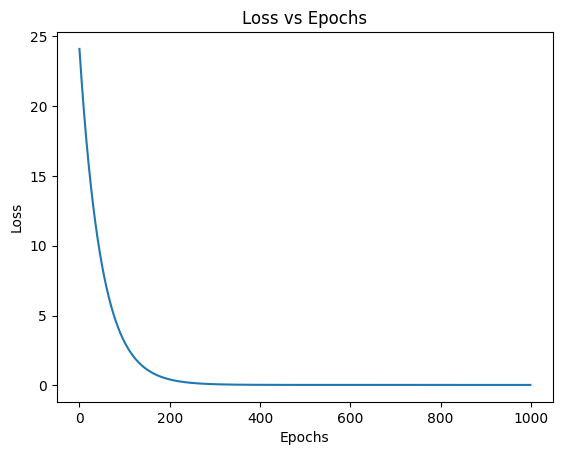

In [14]:
# Plot of Loss vs Iteration
plt.plot(history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

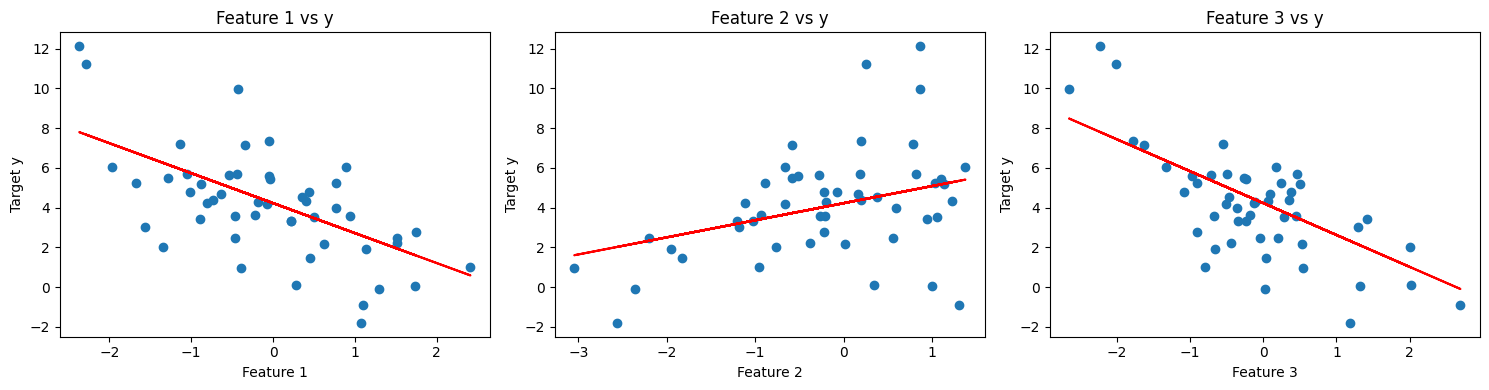

In [15]:
features = X.shape[1]
fig, axes = plt.subplots(1, features, figsize = (5 * features, 4))

for i in range(features):
    axes[i].scatter(X_test[:, i], y_test) # Test data points
    axes[i].plot(X_test[:, i], w[i] * X_test[:, i] + b, color = 'red') # line predicted from our model
    axes[i].set_xlabel(f'Feature {i+1}')
    axes[i].set_ylabel('Target y')
    axes[i].set_title(f'Feature {i+1} vs y')

plt.tight_layout()
plt.show()

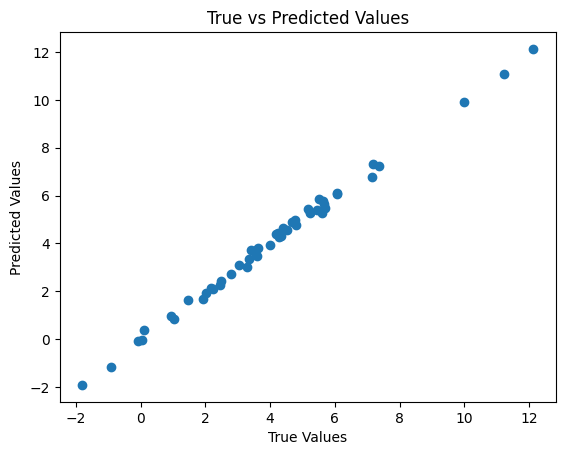

In [16]:
# Plotting Predicted values vs True values for Test data
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

In [17]:
# The above graph seems like points lying on y = x line which suggests y_pred and y_true are almost equal
# So, our Linear Regression model is working fine

Without Standardization (Lambda = 0)
Epoch 0: Loss: 24.08780070389058
Epoch 100: Loss: 2.639548453091767
Epoch 200: Loss: 0.3494653072504803
Epoch 300: Loss: 0.08284302710268941
Epoch 400: Loss: 0.04705936233317433
Epoch 500: Loss: 0.041321554554717525
Epoch 600: Loss: 0.040241245094789505
Epoch 700: Loss: 0.04001482490782312
Epoch 800: Loss: 0.039964549874836684
Epoch 900: Loss: 0.039953075834268124


Lambda = 0.0
Epoch 0: Loss: 24.08780070389058
Epoch 100: Loss: 3.095798030847957
Epoch 200: Loss: 0.4317572848050135
Epoch 300: Loss: 0.09058217499989107
Epoch 400: Loss: 0.04653767241761295
Epoch 500: Loss: 0.04081190503614732
Epoch 600: Loss: 0.04006305940859755
Epoch 700: Loss: 0.03996461131239399
Epoch 800: Loss: 0.03995161034144778
Epoch 900: Loss: 0.03994988666979407


Lambda = 0.01
Epoch 0: Loss: 24.08780070389058
Epoch 100: Loss: 3.0959566905130553
Epoch 200: Loss: 0.4319578616450632
Epoch 300: Loss: 0.09077780245281734
Epoch 400: Loss: 0.04672778278320986
Epoch 500: Loss: 0.0409

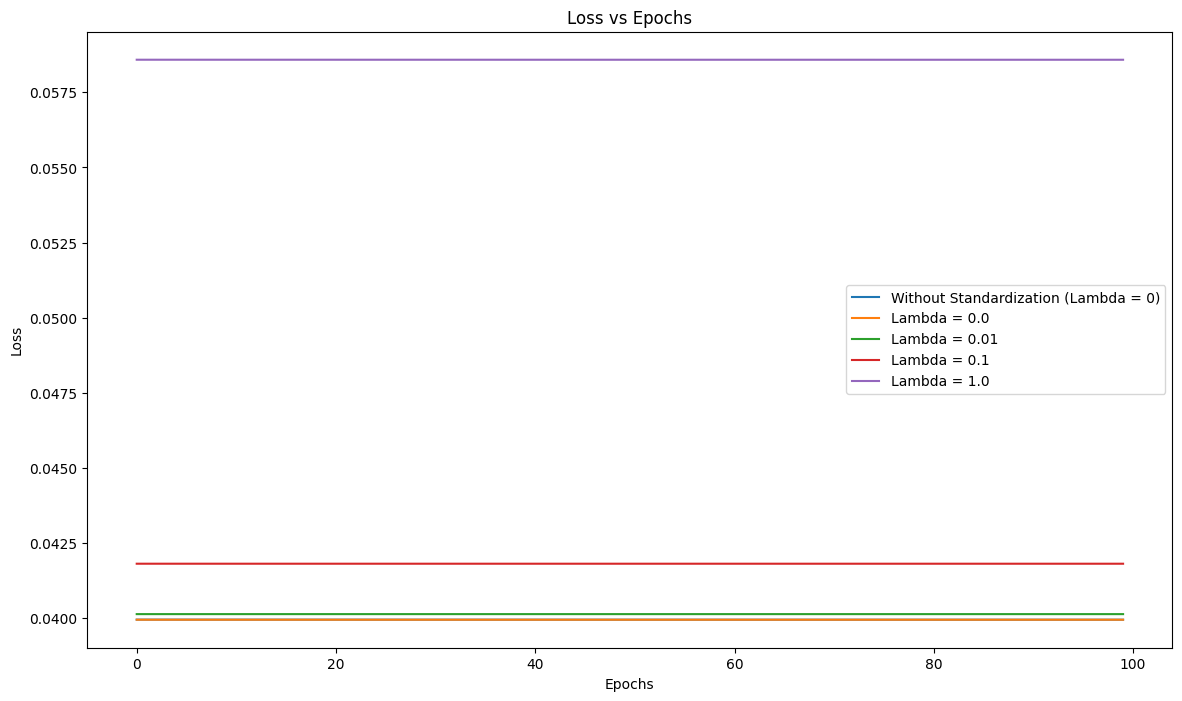

In [18]:
# Bonus Task
# Comparing convergence with and without standardization and also at different values of lambda when standardized

plt.figure(figsize=(14, 8))

# Without Standardization
linear_regression = LinearRegressionManual()
print("Without Standardization (Lambda = 0)")
w,b,history = linear_regression.fit(X_train, y_train)
print("\n")
plt.plot(history[-100:], label = 'Without Standardization (Lambda = 0)')

# With different lambdas and Standardization
lambdas = [0.0, 0.01, 0.1, 1.0]
# Plotting for each lambda
for l in lambdas:
    linear_regression = LinearRegressionManual(l2_lambda = l)
    print(f"Lambda = {l}")
    w, b, history = linear_regression.fit(X_train_scaled, y_train)
    print("\n")
    plt.plot(history[-100:], label = f'Lambda = {l}') # Plotting for the last 100 epochs so observe the difference

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

In [19]:
# Although not clear with the figure but as can be seen in loss printed for every epochs,
# Convergence with standardizing the features is comparatively better than without standardization

# Also value of lambda depends on dataset used and can be decided by applying EDA on dataset or when any outlier is present
# For our dataset, lambda = 0.0 is much better choice cause increasing lambda increases the loss


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [20]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [21]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        # Initializing weights, bias and history
        self.weights = None
        self.bias = None
        self.history = np.zeros(epochs)

    def fit(self, X, y):
        m, n = X.shape
        # Gradient Descent
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        # Iterating for each epoch
        for epoch in range(self.epochs):
            y_pred = sigmoid(np.dot(X, self.weights) + self.bias) # Predicted value
            # Binary Cross Entropy Loss + L2 Loss
            loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) + (self.l2_lambda / (2 * m)) * np.dot(self.weights, self.weights)
            self.history[epoch] = loss  # Storing loss for current epoch
            # Calculating dw and db
            dw = (1 / m) * np.dot(X.T, (y_pred - y)) + (self.l2_lambda / m) * self.weights
            db = (1 / m) * np.sum(y_pred - y)
            # Updating the parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            # Printing loss for certain epoch
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss: {loss}")
        return self.weights, self.bias, self.history

    def predict_proba(self, X):
        return sigmoid(np.dot(X, self.weights) + self.bias)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int) # Taking default threshold as 0.5

In [22]:
# Dataset Creation
np.random.seed(0)
# Dataset size
m = 300   # samples
n = 3     # features

# Features
X = np.random.randn(m, n)
# True parameters
true_weights = np.array([1.5, -2.0, 0.7])
true_bias = -0.3

# Generate probabilities
logits = np.dot(X, true_weights) + true_bias
probs = sigmoid(logits)

# Binary labels
y = (probs >= 0.5).astype(int)

In [23]:
# Shuffle data for train test split
def shuffle_data(X, y, seed=42):
    np.random.seed(seed)
    indices = np.random.permutation(X.shape[0])
    return X[indices], y[indices]

In [24]:
X, y = shuffle_data(X, y)

In [25]:
# Train-test split
X_train, y_train = X[:200], y[:200]
X_test, y_test = X[200:], y[200:]

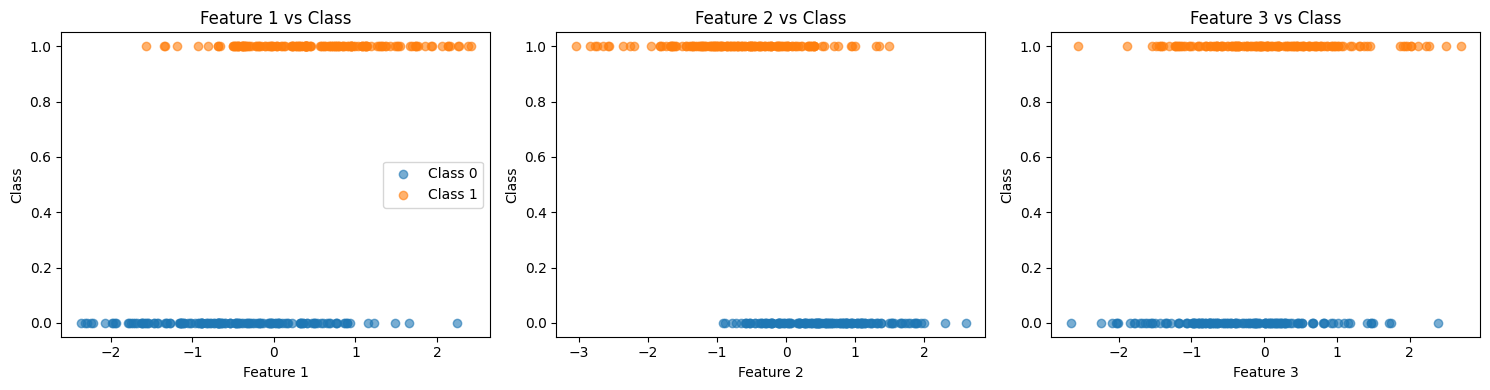

In [26]:
# Display the data points
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i in range(3):
    axes[i].scatter(X[y == 0][:, i], y[y == 0], label="Class 0", alpha=0.6)
    axes[i].scatter(X[y == 1][:, i], y[y == 1], label="Class 1", alpha=0.6)
    axes[i].set_xlabel(f"Feature {i+1}")
    axes[i].set_ylabel("Class")
    axes[i].set_title(f"Feature {i+1} vs Class")

axes[0].legend()
plt.tight_layout()
plt.show()

In [27]:
# Standardizing the features
scalar_logistic = StandardScalerManual()
X_train_scale = scalar_logistic.fit_transform(X_train)
X_test_scale = scalar_logistic.transform(X_test)

In [28]:
logistic_regression = LogisticRegressionManual(epochs = 2000, l2_lambda = 0.01)  # Calling Logistic Regression model with L2 lamda = 0.01 and Epochs = 2000

In [29]:
w, b, history = logistic_regression.fit(X_train_scale, y_train)

Epoch 0: Loss: 0.6931471805599452
Epoch 100: Loss: 0.5548690000951296
Epoch 200: Loss: 0.47098333758813865
Epoch 300: Loss: 0.4156310809244512
Epoch 400: Loss: 0.37626988371480286
Epoch 500: Loss: 0.3466353640658376
Epoch 600: Loss: 0.323349186721118
Epoch 700: Loss: 0.30444703181471605
Epoch 800: Loss: 0.28871127768386967
Epoch 900: Loss: 0.27534628522107685
Epoch 1000: Loss: 0.26380908959276944
Epoch 1100: Loss: 0.253715569483502
Epoch 1200: Loss: 0.2447856456769189
Epoch 1300: Loss: 0.23680980460992315
Epoch 1400: Loss: 0.2296278444961726
Epoch 1500: Loss: 0.22311492396861402
Epoch 1600: Loss: 0.21717213450670717
Epoch 1700: Loss: 0.21171996559105252
Epoch 1800: Loss: 0.2066936720762738
Epoch 1900: Loss: 0.202039923861405


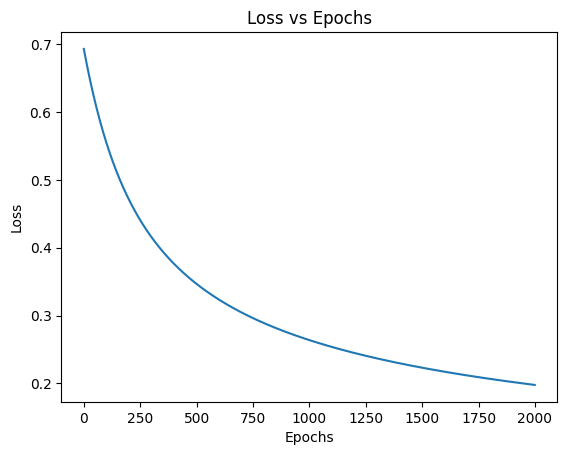

In [30]:
# Plot Loss vs Iteration
plt.plot(history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

In [31]:
y_pred = logistic_regression.predict(X_test_scale)  # Predict for test dataset
accuracy = np.mean(y_pred == y_test)

In [32]:
print("Weights:", w)
print("Bias:", b)
print("Loss:", history[-1])
print("Accuracy:", accuracy * 100, "%")

Weights: [ 1.58838347 -2.11650319  0.57833178]
Bias: 0.014996807858844429
Loss: 0.1977560982873176
Accuracy: 98.0 %


In [33]:
# Correct predictions
correct_0 = np.sum((y_test == 0) & (y_pred == 0))
correct_1 = np.sum((y_test == 1) & (y_pred == 1))

# Wrong predictions
wrong = np.sum(y_test != y_pred)

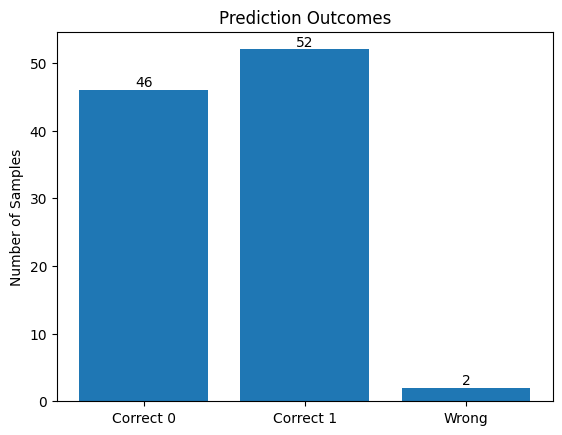

In [34]:
labels = ["Correct 0", "Correct 1", "Wrong"]
counts = [correct_0, correct_1, wrong]

# Display
plt.bar(labels, counts)
plt.ylabel("Number of Samples")
plt.title("Prediction Outcomes")

# Show values on bars
for i, v in enumerate(counts):
    plt.text(i, v + 0.5, str(v), ha = "center")

plt.show()

Without Standardization (Lambda = 0)
Epoch 0: Loss: 0.6931471805599452
Epoch 100: Loss: 0.5471729397528313
Epoch 200: Loss: 0.46136300903778427
Epoch 300: Loss: 0.4057571527166992
Epoch 400: Loss: 0.36661089597230295
Epoch 500: Loss: 0.3373103912406982
Epoch 600: Loss: 0.3143703277604553
Epoch 700: Loss: 0.29579373371812845
Epoch 800: Loss: 0.2803547175863037
Epoch 900: Loss: 0.2672575683692642


Lambda = 0.0
Epoch 0: Loss: 0.6931471805599452
Epoch 100: Loss: 0.5548627013702334
Epoch 200: Loss: 0.4709645376366238
Epoch 300: Loss: 0.4155979115628483
Epoch 400: Loss: 0.37622181604699734
Epoch 500: Loss: 0.34657233658002684
Epoch 600: Loss: 0.3232713211937029
Epoch 700: Loss: 0.3043545259010619
Epoch 800: Loss: 0.28860435925006134
Epoch 900: Loss: 0.275225191314282


Lambda = 0.01
Epoch 0: Loss: 0.6931471805599452
Epoch 100: Loss: 0.5548690000951296
Epoch 200: Loss: 0.47098333758813865
Epoch 300: Loss: 0.4156310809244512
Epoch 400: Loss: 0.37626988371480286
Epoch 500: Loss: 0.346635364065

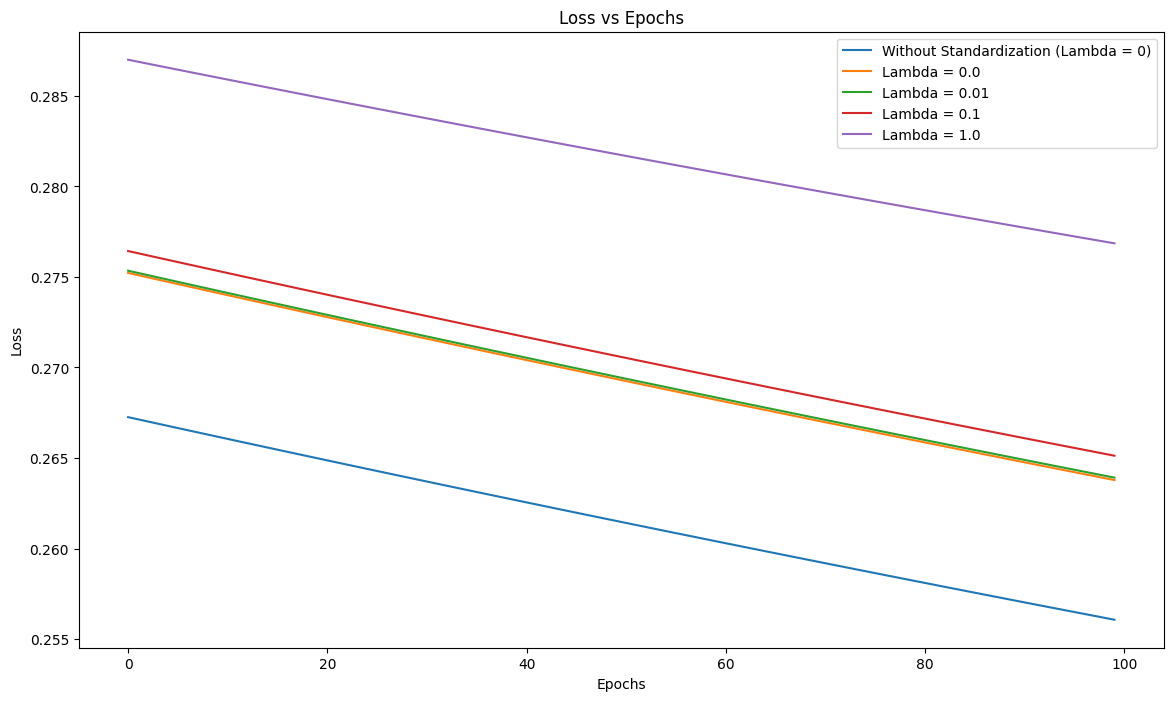

In [35]:
# Bonus Task
# Comparing convergence with and without standardization and also at different values of lambda when standardized

plt.figure(figsize=(14, 8))

# Without Standardization
logistic_regression = LogisticRegressionManual()
print("Without Standardization (Lambda = 0)")
w,b,history = logistic_regression.fit(X_train, y_train)
print("\n")
plt.plot(history[-100:], label = 'Without Standardization (Lambda = 0)')

# With different lambdas and Standardization
lambdas = [0.0, 0.01, 0.1, 1.0]
# Plotting for each lambda
for l in lambdas:
    logistic_regression = LogisticRegressionManual(l2_lambda = l)
    print(f"Lambda = {l}")
    w, b, history = logistic_regression.fit(X_train_scale, y_train)
    print("\n")
    plt.plot(history[-100:], label = f'Lambda = {l}') # Plotting for the last 100 epochs so observe the difference

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

In [36]:
# In this case logistic regression model converges better without standardization
# This maybe because in our dataset, features are already on similar scales
# Similarly, incresing lambda also increases the loss


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [37]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    m, n = M.shape
    data = M.flatten()
    # Initializing centroids as k random data points
    centroids = np.random.choice(data, size=k, replace=False)
    assignment_table = np.zeros((m, n), dtype=int)

    # Iterating for epochs
    for iteration in range(max_iters):
        cookbook = {i: [] for i in range(k)}
        # For each individual element
        for i in range(m):
            for j in range(n):
                # Calculating the distances
                distances = np.abs(data[i * n + j] - centroids)
                # Updating assignment_table and cookbook
                assignment_table[i, j] = np.argmin(distances)
                cookbook[assignment_table[i, j]].append((i,j))

        prev_centroids = centroids.copy()
        # Updating centroids
        for cluster_id in range(k):
            if cookbook[cluster_id]:  # avoid empty cluster
                cluster_values = [M[i, j] for (i, j) in cookbook[cluster_id]]
                centroids[cluster_id] = np.mean(cluster_values)
        # If values of centroids doesn't change much then break the loop
        if np.allclose(prev_centroids, centroids):
            break
    return assignment_table, cookbook, centroids

In [38]:
# Dataset Creation
np.random.seed(0)
M = np.random.randint(0, 100, size = (6, 6))
print(M)

[[44 47 64 67 67  9]
 [83 21 36 87 70 88]
 [88 12 58 65 39 87]
 [46 88 81 37 25 77]
 [72  9 20 80 69 79]
 [47 64 82 99 88 49]]


In [39]:
k = 3  # number of clusters
assignment_table, cookbook, centroids = kmeans_matrix(M, k)

In [40]:
print("Centroids:", centroids)

Centroids: [59 23 85]


In [41]:
print("Assignment Table:\n", assignment_table)

Assignment Table:
 [[0 0 0 0 0 1]
 [2 1 1 2 0 2]
 [2 1 0 0 1 2]
 [0 2 2 1 1 2]
 [0 1 1 2 0 2]
 [0 0 2 2 2 0]]


In [42]:
for cluster_id, positions in cookbook.items():
    print(f"Cluster {cluster_id}: {positions}")

Cluster 0: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 2), (2, 3), (3, 0), (4, 0), (4, 4), (5, 0), (5, 1), (5, 5)]
Cluster 1: [(0, 5), (1, 1), (1, 2), (2, 1), (2, 4), (3, 3), (3, 4), (4, 1), (4, 2)]
Cluster 2: [(1, 0), (1, 3), (1, 5), (2, 0), (2, 5), (3, 1), (3, 2), (3, 5), (4, 3), (4, 5), (5, 2), (5, 3), (5, 4)]


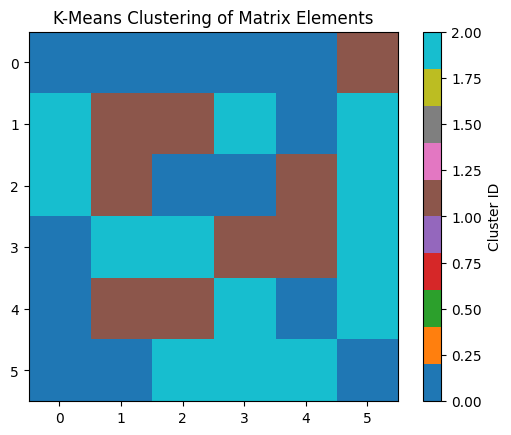

In [43]:
plt.imshow(assignment_table, cmap = "tab10")
plt.colorbar(label = "Cluster ID")  # For color bar
plt.title("K-Means Clustering of Matrix Elements")
plt.show()

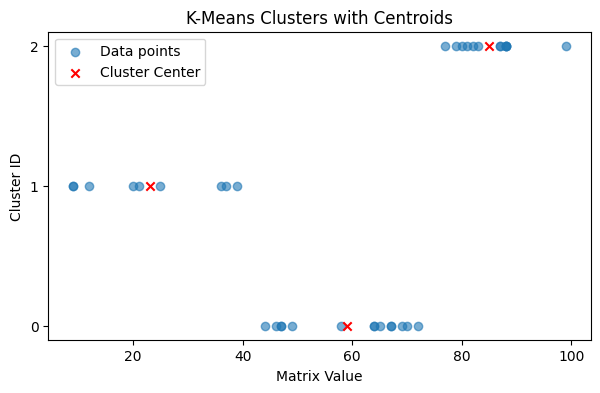

In [44]:
# For plotting data points against cluster
values = []
clusters = []

for cluster_id, positions in cookbook.items():
    for (i, j) in positions:
        values.append(M[i, j])
        clusters.append(cluster_id)

values = np.array(values)
clusters = np.array(clusters)

# Display
plt.figure(figsize=(7, 4))

# Plot clustered values
plt.scatter(values, clusters, alpha=0.6, label="Data points")

# Plot centroids as crosses
for i, c in enumerate(centroids):
    plt.scatter(c, i, marker = 'x', color='red', label = "Cluster Center" if i == 0 else "")

plt.xlabel("Matrix Value")
plt.ylabel("Cluster ID")
plt.yticks(range(len(centroids)))
plt.title("K-Means Clusters with Centroids")
plt.legend()
plt.show()


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.


In [45]:
# Bonus task has been done at end of both Question 1 and Question 2
# Also Lasso Regression is also implemented in Question 1 as LinearRegressionManual_L1()

In [46]:
# Generally, feature standardization leads to smoother and slightly faster convergence
# by improving gradient conditioning during optimization

# The optimal value of the regularization parameter λ depends on the dataset
# In general, small values of λ (e.g., 0.01 or 0.1) provide a good balance between preventing
# overfitting and maintaining low training loss
# Very large λ values can cause underfitting by overly penalizing model weights